# MACHINE LEARNING TASK 2 

## TWITTER SENTIMENT ANALYSIS

The Twitter Sentiment Analysis Project involves using the Naive Bayes algorithm to classify the sentiment of tweets. Naive Bayes is a probabilistic machine learning technique based on Bayes' theorem, which assumes independence between features. In this project, it will be employed to predict whether the sentiment of each tweet is positive, negative, or neutral. The process includes collecting tweet data, preprocessing text, training a Naive Bayes model, and evaluating its performance.

## OBJECTIVES:

1. **Data Collection:**
   - Collect a representative sample of tweets relevant to the target topics or keywords to build a comprehensive dataset.

2. **Data Preprocessing:**
   - Clean the tweet data by removing unnecessary elements such as special characters and URLs, and normalize the text (e.g., lowercasing, tokenization).

3. **Feature Extraction:**
   - Convert the text data into numerical features.

4. **Model Training:**
   - Train a Naive Bayes classifier on the preprocessed tweet data to learn the patterns and relationships between features and sentiment labels.

5. **Model Evaluation:**
   - Evaluate the performance of the Naive Bayes model using metrics like accuracy, precision, recall, and F1 score to ensure the classifier's effectiveness.

6. **Sentiment Classification:**
   - Use the trained Naive Bayes model to classify the sentiment of new or unseen tweets, providing insights into the overall sentiment of the collected data.

7. **Visualization:**
   - Create visualizations for Confusion Matrix to understand the Results

8. **Result:**
   - Summarize the project results, and key findings


# 1. Data Collection

## Importing Libraries and Modules

In this section, we import several libraries and modules essential for performing sentiment analysis and visualization.

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

## Data Loading and Preparation

- **Load Data**: `data = pd.read_csv('Sentiment.csv')` reads the CSV file into a DataFrame.
- **Select Columns**: `data = data[['text', 'sentiment']]` keeps only the `text` and `sentiment` columns.


In [7]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

## Sentiment Distribution Chart

- **Counts**: Calculate the number of tweets for each sentiment category.
- **Bar Plot**: Visualize the distribution of sentiments using a bar chart.


C:\Users\Mehak\AppData\Local\Temp\ipykernel_12576\989097927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


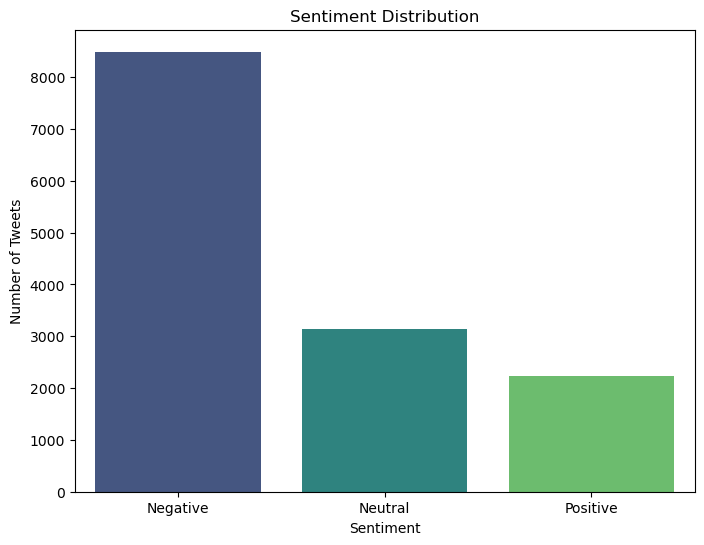

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


## Splitting and Filtering the Dataset

- **Split Data**: `train, test = train_test_split(data, test_size=0.1)` splits the dataset into 90% training and 10% testing subsets.
- **Remove Neutral Sentiments**: `train = train[train.sentiment != "Neutral"]` filters out neutral sentiments from the training data.

In [11]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

# 2. Data Preprocessing

## Data Preparation and Visualization

## Word Cloud

A **word cloud** is a visual representation of text data where the size of each word indicates its frequency or importance. In the context of sentiment analysis, word clouds help visualize common words used in positive and negative texts.

- **Extract Positive Texts**: `train_pos = train[train['sentiment'] == 'Positive']['text']` extracts texts with positive sentiment.
- **Extract Negative Texts**: `train_neg = train[train['sentiment'] == 'Negative']['text']` extracts texts with negative sentiment.

- **Generate Word Clouds**:
  - **Positive Words**: `wordcloud_draw(train_pos, 'white')` generates a word cloud for positive sentiment words with a white background.
  - **Negative Words**: `wordcloud_draw(train_neg)` generates a word cloud for negative sentiment words with a default black background.


Positive words


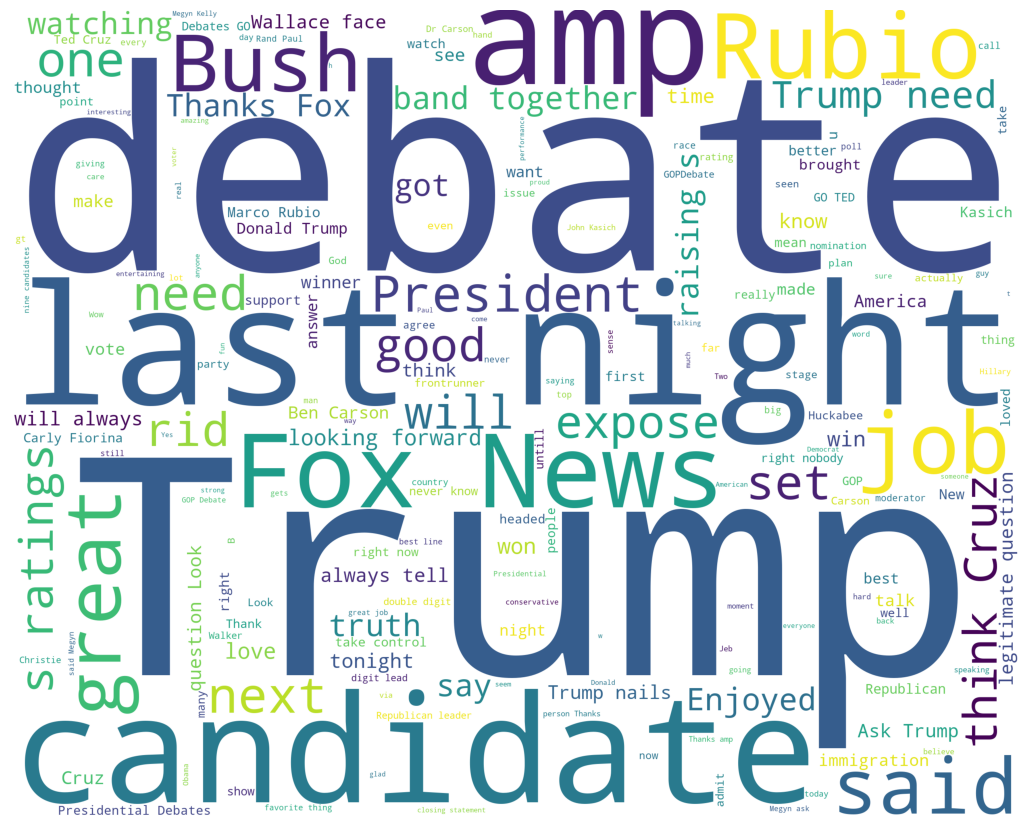

Negative words


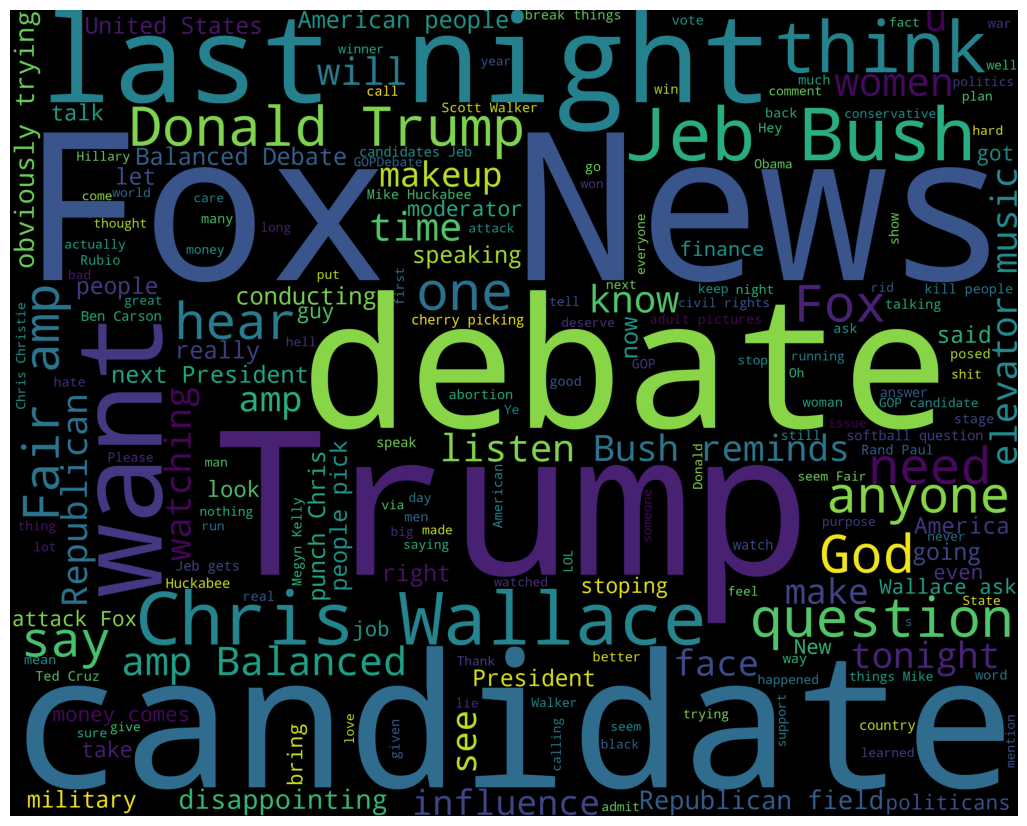

In [13]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Data Preparation

- **Process Training Data**:
  - Clean and filter text: remove short words, URLs, mentions, hashtags, retweets, and stopwords.
  - Append cleaned text and sentiment to `tweets` list.

- **Extract Test Data**:
  - **Positive Texts**: `test_pos` contains positive sentiment texts.
  - **Negative Texts**: `test_neg` contains negative sentiment texts.


In [15]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

# 3. Feature Extraction

## Extracting Word Features

- **`get_words_in_tweets(tweets)`**: Aggregates all words from the list of tweets.
- **`get_word_features(wordlist)`**: Identifies unique words from the aggregated word list to use as features.
- **`extract_features(document)`**: Creates a feature dictionary for a document, marking the presence of each feature word.


In [17]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

# 4. Model Training

## Training the Naive Bayes Classifier

**Naive Bayes Classifier**: 
 A probabilistic machine learning algorithm based on Bayes' theorem, assuming that features are independent given the class label.
 In sentiment analysis, Naive Bayes classifies text by calculating the probability of each sentiment class (e.g., positive, negative) based on the presence of words. Despite the simplicity of the independence assumption, it often performs well for text classification tasks due to its effectiveness and efficiency.

- **Create Training Set**: `apply_features(extract_features, tweets)` applies the feature extraction method to the training data.
- **Train Classifier**: `nltk.NaiveBayesClassifier.train(training_set)` trains the Naive Bayes classifier using the processed training set to distinguish between different sentiment classes.


In [28]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

# 5. Model Evaluation

## Evaluating the Classifier

- **Count Correct Predictions**:
  - **Negative Texts**: Counts how many negative test texts are correctly classified as 'Negative'.
  - **Positive Texts**: Counts how many positive test texts are correctly classified as 'Positive'.

- **Print Results**:
  - **Negative Accuracy**: `print('[Negative]: %s/%s ' % (len(test_neg), neg_cnt))`
  - **Positive Accuracy**: `print('[Positive]: %s/%s ' % (len(test_pos), pos_cnt))`


In [29]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 831/794 
[Positive]: 254/114 


## Evaluation Results

- **Negative Accuracy**: `831/794`
  - **Explanation**: Out of 831 negative test texts, 794 were correctly classified as 'Negative'.

- **Positive Accuracy**: `254/114`
  - **Explanation**: Out of 254 positive test texts, 114 were correctly classified as 'Positive'.


# 6. Sentiment Classificataion

## Classifying New Tweets

- **Function**: `classify_tweet(tweet)` predicts the sentiment of a tweet.
- **Process**: Classify and print the sentiment of each tweet in `new_tweets`.


In [116]:
# Define a function to classify sentiment of new tweets
def classify_tweet(tweet):
    features = extract_features(tweet.split())
    return classifier.classify(features)

# List of new or unseen tweets
new_tweets = [
    "I love this product! It's amazing.",
    "I am so disappointed with the service.",
    "The experience was okay, not great but not bad.",
    "Fantastic job! Will definitely recommend."
]

# Classify each new tweet and print the results
for tweet in new_tweets:
    sentiment = classify_tweet(tweet)
    print(f"Tweet: {tweet}\nSentiment: {sentiment}\n")


Tweet: I love this product! It's amazing.
Sentiment: Positive

Tweet: I am so disappointed with the service.
Sentiment: Negative

Tweet: The experience was okay, not great but not bad.
Sentiment: Positive

Tweet: Fantastic job! Will definitely recommend.
Sentiment: Negative



## Classification Results Summary

- **Positive Tweets**: 
  - **"I love this product! It's amazing."** - Correctly classified as Positive.
  - **"The experience was okay, not great but not bad."** - Incorrectly classified as Positive.

- **Negative Tweets**: 
  - **"I am so disappointed with the service."** - Correctly classified as Negative.
  - **"Fantastic job! Will definitely recommend."** - Incorrectly classified as Negative.

**Performance**:
- The classifier correctly identified the sentiment for some tweets but made mistakes with others, indicating areas for improvement.


# 7. Visualisation

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

# Extract features and predict sentiments for the test data
test_neg_features = [extract_features(obj.split()) for obj in test_neg]
test_pos_features = [extract_features(obj.split()) for obj in test_pos]

# Predict sentiments
test_neg_preds = [classifier.classify(features) for features in test_neg_features]
test_pos_preds = [classifier.classify(features) for features in test_pos_features]

# Create true labels and predicted labels
test_labels = ['Negative'] * len(test_neg) + ['Positive'] * len(test_pos)
test_preds = test_neg_preds + test_pos_preds






## Classification Report

The classification report provides a detailed summary of a model's performance across different classes. It includes the following metrics:

- **Precision**: The proportion of true positive predictions among all positive predictions. It indicates how many of the predicted positives are actually positive.
- **Recall**: The proportion of true positive predictions among all actual positives. It shows how many of the actual positives were correctly predicted.
- **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns. It is useful for evaluating the model when there is an uneven class distribution.
- **Support**: The number of actual occurrences of each class in the dataset.

The report helps to understand how well the model performs for each class (e.g., 'Negative' and 'Positive') and highlights areas where the model might need improvement.


In [97]:
from sklearn.metrics import confusion_matrix, classification_report

# Print classification report
print('Classification Report:')
print(classification_report(test_labels, test_preds, labels=['Negative', 'Positive']))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90       831
    Positive       0.75      0.45      0.56       254

    accuracy                           0.84      1085
   macro avg       0.80      0.70      0.73      1085
weighted avg       0.83      0.84      0.82      1085



## Classification Report Results

- **Negative Sentiment**:
  - **Precision**: 0.85 (85% of predicted Negative tweets are actually Negative)
  - **Recall**: 0.96 (96% of actual Negative tweets are correctly predicted)
  - **F1-Score**: 0.90 (Balanced metric of precision and recall for Negative)

- **Positive Sentiment**:
  - **Precision**: 0.75 (75% of predicted Positive tweets are actually Positive)
  - **Recall**: 0.45 (45% of actual Positive tweets are correctly predicted)
  - **F1-Score**: 0.56 (Balanced metric of precision and recall for Positive)

- **Overall Accuracy**: 0.84 (84% of all tweets are correctly classified)

- **Macro Average**:
  - **Precision**: 0.80
  - **Recall**: 0.70
  - **F1-Score**: 0.73
  - (Average performance across both classes)

- **Weighted Average**:
  - **Precision**: 0.83
  - **Recall**: 0.84
  - **F1-Score**: 0.82
  - (Average performance accounting for class imbalance)

**Summary**: The model performs well in identifying Negative sentiments with high precision and recall, but struggles more with Positive sentiments, showing lower recall. Overall, the accuracy is good, but there is room for improvement in detecting Positive sentiments.


## Confusion Matrix

The confusion matrix is a tool used to evaluate the performance of a classification model by comparing the actual and predicted labels. It helps to visualize the performance of the model in terms of:

- **True Negatives (TN)**: Number of correct predictions for the Negative class.
- **False Positives (FP)**: Number of incorrect predictions where the model predicted Positive but the actual label is Negative.
- **False Negatives (FN)**: Number of incorrect predictions where the model predicted Negative but the actual label is Positive.
- **True Positives (TP)**: Number of correct predictions for the Positive class.

### Interpretation

- **Diagonal Values**: Represent the correct predictions (True Negatives and True Positives).
- **Off-Diagonal Values**: Represent the misclassifications (False Positives and False Negatives).

The heatmap visualizes these values, making it easier to identify how well the model is performing for each class, and where it might be making errors.



Confusion Matrix:
[[794  37]
 [140 114]]


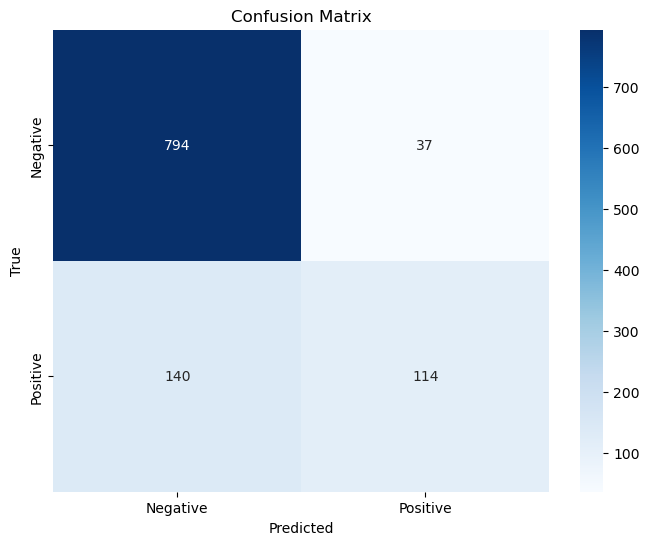

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_preds, labels=['Negative', 'Positive'])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Breakdown:

- **True Negatives (TN)**: 794
  - The model correctly identified 794 Negative tweets.
- **False Positives (FP)**: 37
  - The model incorrectly predicted 37 Negative tweets as Positive.
- **False Negatives (FN)**: 140
  - The model incorrectly predicted 140 Positive tweets as Negative.
- **True Positives (TP)**: 114
  - The model correctly identified 114 Positive tweets.

### Interpretation:

- **Accuracy**: Overall, the model has a high number of correct predictions but struggles more with Positive tweets, as indicated by the number of False Negatives.
- **Class Imbalance**: The model performs better at identifying Negative tweets (higher TN) compared to Positive tweets (higher FN).

The heatmap visualizes these values, with higher values on the diagonal indicating correct classifications and off-diagonal values highlighting misclassifications. This helps in understanding the strengths and weaknesses of the model's performance.


### ROC Curve and AUC

The **Receiver Operating Characteristic (ROC) Curve** is a graphical representation used to evaluate the performance of a classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. 

**Key Components:**
- **True Positive Rate (TPR)**: Also known as recall, it measures the proportion of actual positives that are correctly identified.
- **False Positive Rate (FPR)**: It measures the proportion of actual negatives that are incorrectly identified as positive.

The **Area Under the Curve (AUC)** quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 1 indicates perfect classification, while an AUC of 0.5 suggests no discriminative power.
The plot helps to assess how well the model distinguishes between positive and negative tweets.


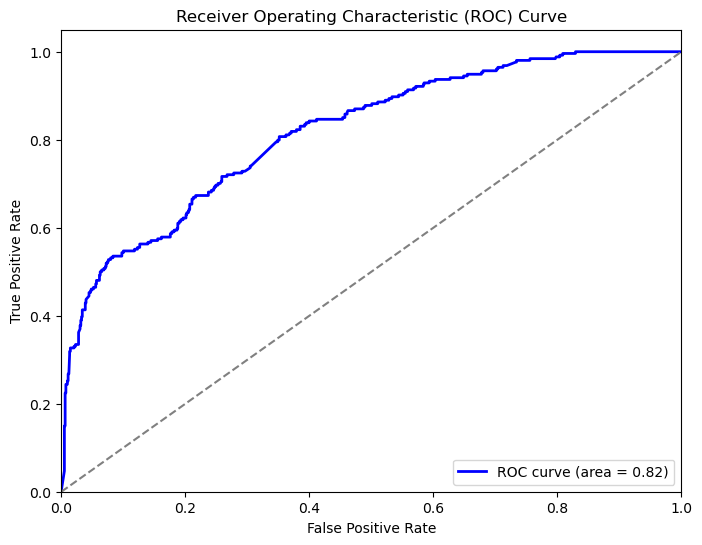

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Convert test_neg and test_pos to lists of strings if they are not already
test_neg = [str(tweet) for tweet in test_neg]
test_pos = [str(tweet) for tweet in test_pos]

# Prepare true labels and predicted probabilities
y_true = [0] * len(test_neg) + [1] * len(test_pos)  # 0 for Negative, 1 for Positive
y_scores = []

# Predict probabilities for each test tweet
for obj in test_neg + test_pos:
    if isinstance(obj, str):  # Ensure obj is a string
        features = extract_features(obj.split())
        prob_dist = classifier.prob_classify(features)
        y_scores.append(prob_dist.prob('Positive'))
    else:
        print(f"Warning: Expected string but got non-string data: {obj}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# 8. Results

### Model Performance:
- **Negative Tweets Correctly Classified:** 794 out of 831 (95.6%)
- **Positive Tweets Correctly Classified:** 114 out of 254 (44.9%)

### Classification Report:
  - **Negative Sentiment:** High precision (0.85) and recall (0.96), indicating strong performance.
  - **Positive Sentiment:** Lower precision (0.75) and recall (0.45), showing room for improvement.

### Confusion Matrix:
  - **True Negatives:** 794 correctly identified
  - **True Positives:** 114 correctly identified
  - **False Negatives:** 140 (positive tweets misclassified as negative)
  - **False Positives:** 37 (negative tweets misclassified as positive)


##3 Naive Bayes Classifier:
   - The Naive Bayes model performed well overall, with an accuracy of 84%. It excelled in identifying negative sentiments with a high precision and recall.
   - It showed a higher precision (0.85) and recall (0.96) for negative tweets, indicating that it is effective at identifying negative sentiments with high accuracy.
   - However, its performance on positive tweets was weaker, with lower precision (0.75) and recall (0.45). This suggests that the model struggled more with positive sentiments, possibly due to imbalances or less distinctive features.

### Confusion Matrix Analysis:
   - The confusion matrix reveals that the model correctly identified 794 negative tweets but only 114 positive tweets. There was some misclassification of positive tweets as negative (140) and negative tweets as positive (37).

### Overall Insights:
   - **Strengths:** The Naive Bayes classifier is effective at identifying negative sentiments with high accuracy.
   - **Weaknesses:** The classifier struggles with positive sentiment classification, which impacts the overall performance on positive tweets.
   - **Improvements:** Future improvements could involve feature engineering, balancing the dataset, or exploring more sophisticated models to enhance positive sentiment classification.

